note

1:rasterio doesn't work on python3.8 probably.\
    therefore you need other python envirnment on less than python3.7\
    (this code work on python3.7)

2:installing rasterio\
    conda install rasterio -c conda-forge
    
3:reference\
https://rasterio.readthedocs.io/en/stable/api/rasterio.features.html#rasterio.features.rasterize

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import geopandas as gpd
import rasterio as rasio
import rasterio.features as rasioftr

from affine import Affine

In [2]:
#your filename of shapefile
filename = '/work/a01/hnara/lake_volume/upper_basin/upper_basin_shape/Mead/Mead.shp'

#reading shape file by using geopandas
shape = gpd.read_file(filename)

#this step may not be needed in your code, if your shape file has other column
shape['value'] = 1

In [3]:
#show your shape file data
print(shape.head())

   FID                                           geometry  value
0    0  POLYGON ((-110.30000 43.40000, -109.70000 43.4...      1


In [4]:
#item is the column which you want to keep when rasterizing
item = 'value'
shps = [(s, i) for i, s in zip(shape[item], shape['geometry'])]

In [5]:
#this is the transformation step of coordinate system, and you may need to change a little
#in this case, earth coordinate system is converted to numpy array
nlatlon = (180, 360)
WSEN_ar = (-180, -90, 180, 90)
transform=Affine(1, 0, -180, 0, -1, 90)
print(transform)

| 1.00, 0.00,-180.00|
| 0.00,-1.00, 90.00|
| 0.00, 0.00, 1.00|


In [6]:
#rasterization step
#fill is the value outside the polygon
result = rasioftr.rasterize(
    shps,
    out_shape=nlatlon,
    transform=transform,
    fill=np.nan,
    all_touched=True)

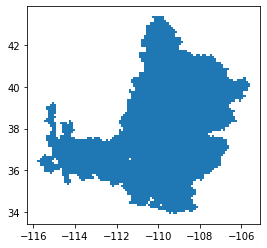

In [7]:
#original shape file
shape.plot()

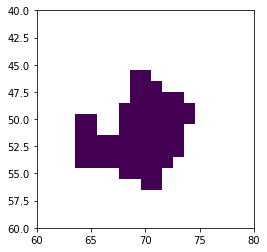

In [8]:
#rasterized data
plt.figure()
plt.imshow(result)
plt.xlim(60,80)
plt.ylim(60,40)
plt.show()